Import packages and set display options

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
def import_data(file_path):
    drive.mount('/content/drive')

    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except:
        print(f"Failed to load file!")
        return None

In [ ]:
# If you wish to run the code below locally for testing - please download the files and make the replacements listed below:
import pandas as pd
import os

def import_data(file_name):
    # Get the current working directory
    current_directory = os.getcwd()

    # Set the folder names - change "additional_path_to_data_folder" with your own path:
    data_folder = os.path.join(current_directory, 'additional_path_to_data_folder')  # Replace with the actual folder name

    # Construct the full file path
    file_path = os.path.join(data_folder, file_name)

    try:
        data = pd.read_csv(file_path)
        print("File loaded successfully!")
        return data
    except Exception as e:
        print(f"Failed to load file: {e}")
        return None

# Specify the CSV file name
file_name = 'MetroPT3(AirCompressor).csv'
data = import_data(file_name)

# Display the first few rows of the dataframe
if data is not None:
    print(data.head())

In [ ]:
file_path = '/content/drive/MyDrive/GeorgiaTech/Proposal/MetroPT3(AirCompressor).csv'
data = import_data(file_path)
data.head()

Mounted at /content/drive
File loaded successfully!


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.01,9.36,9.34,-0.02,9.36,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
1,10,2020-02-01 00:00:10,-0.01,9.35,9.33,-0.02,9.35,53.68,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
2,20,2020-02-01 00:00:19,-0.01,9.34,9.32,-0.02,9.34,53.60,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
3,30,2020-02-01 00:00:29,-0.01,9.33,9.31,-0.02,9.33,53.42,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
4,40,2020-02-01 00:00:39,-0.01,9.32,9.30,-0.02,9.32,53.48,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00


Data Exploration

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

Mapping failure events

In [ ]:
import pandas as pd

failure_data = pd.DataFrame({
    'Start Time': ['4/18/2020 0:00', '5/29/2020 23:30', '6/5/2020 10:00', '7/15/2020 14:30'],
    'End Time': ['4/18/2020 23:59', '5/30/2020 6:00', '6/7/2020 14:30', '7/15/2020 19:00']
})


failure_data['Start Time'] = pd.to_datetime(failure_data['Start Time'])
failure_data['End Time'] = pd.to_datetime(failure_data['End Time'])


failure_data = failure_data.sort_values(by='Start Time').reset_index(drop=True)


failure_data['Previous Start Time'] = failure_data['Start Time'].shift(1)
failure_data['Previous End Time'] = failure_data['End Time'].shift(1)


failure_data['Window Start'] = (failure_data['Start Time'] - pd.Timedelta(days=7)).dt.date


failure_data['Window End'] = (failure_data['Start Time'] - pd.Timedelta(days=1)).dt.date


print(failure_data)




conditions = [
    (data['timestamp'] >= failure_data.iloc[0]['Start Time']) & (data['timestamp'] <= failure_data.iloc[0]['End Time']),
    (data['timestamp'] >= failure_data.iloc[1]['Start Time']) & (data['timestamp'] <= failure_data.iloc[1]['End Time']),
    (data['timestamp'] >= failure_data.iloc[2]['Start Time']) & (data['timestamp'] <= failure_data.iloc[2]['End Time']),
    (data['timestamp'] >= failure_data.iloc[3]['Start Time']) & (data['timestamp'] <= failure_data.iloc[3]['End Time']),
]

choices = [1, 1, 1, 1]

# Assign labels
data['label'] = np.select(conditions, choices, default=0)

           Start Time            End Time Previous Start Time  \
0 2020-04-18 00:00:00 2020-04-18 23:59:00                 NaT   
1 2020-05-29 23:30:00 2020-05-30 06:00:00 2020-04-18 00:00:00   
2 2020-06-05 10:00:00 2020-06-07 14:30:00 2020-05-29 23:30:00   
3 2020-07-15 14:30:00 2020-07-15 19:00:00 2020-06-05 10:00:00   

    Previous End Time Window Start  Window End  
0                 NaT   2020-04-11  2020-04-17  
1 2020-04-18 23:59:00   2020-05-22  2020-05-28  
2 2020-05-30 06:00:00   2020-05-29  2020-06-04  
3 2020-06-07 14:30:00   2020-07-08  2020-07-14  


In [ ]:
data.describe()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,label
count,1516948.00,1516948,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00,1516948.00
mean,7584735.00,2020-05-16 22:58:36.631517184,1.37,8.98,7.57,0.06,8.99,62.64,2.05,0.84,0.16,0.92,0.83,0.00,0.99,0.90,0.94,0.02
min,0.00,2020-02-01 00:00:00,-0.03,0.73,-0.04,-0.03,0.71,15.40,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3792367.50,2020-03-23 05:05:04.500000,-0.01,8.49,8.25,-0.02,8.49,57.78,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00
50%,7584735.00,2020-05-17 08:07:06,-0.01,8.96,8.78,-0.02,8.96,62.70,0.04,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00
75%,11377102.50,2020-07-10 03:07:27.500000,-0.01,9.49,9.37,-0.02,9.49,67.25,3.81,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00
max,15169470.00,2020-09-01 03:59:50,10.68,10.30,10.29,9.84,10.30,89.05,9.29,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,4379053.12,NaN,3.25,0.64,3.33,0.38,0.64,6.52,2.30,0.37,0.37,0.27,0.37,0.06,0.09,0.29,0.24,0.14


Anomaly detection

In [ ]:
pre_failure_data = data[data['label'] != 2]

In [ ]:
pre_failure_data[['DV_pressure', 'Motor_current']].describe()

,DV_pressure,Motor_current
count,1486994.00,1486994.00
mean,0.02,1.98
std,0.28,2.27
min,-0.03,0.02
25%,-0.02,0.04
50%,-0.02,0.04
75%,-0.02,3.79
max,9.84,9.29


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore

def get_k(data, metric_column, k_range = range(1, 11)):
    # Step 1: Elbow Method to determine optimal number of clusters
    inertia = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[[metric_column]])
        inertia.append(kmeans.inertia_)

    # Plot Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
    plt.title(f'Elbow Method for Optimal K (Using {metric_column})')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.grid(True)
    plt.show()

def fit_cluster(data, metric_column, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[[metric_column]])

    cluster_stats = data.groupby('Cluster')[metric_column].agg(['min', 'median', 'max'])

    return print(cluster_stats)

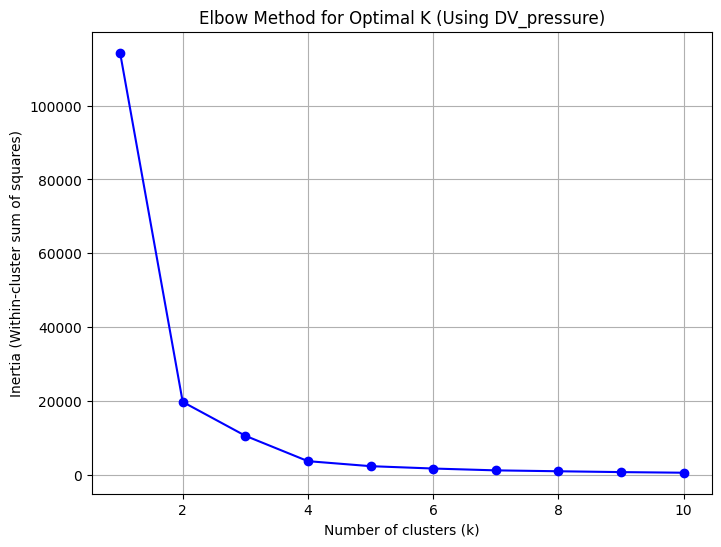

          min  median  max
Cluster                   
0       -0.03   -0.02 1.03
1        1.03    2.03 9.84
95th Percentile: 3.033999999999999
99th Percentile: 5.423500000000001


In [ ]:
filtered_data_copy = pre_failure_data.copy()

metric_column = 'DV_pressure'

get_k(filtered_data_copy, metric_column)
fit_cluster(filtered_data_copy, metric_column, 2)



# Let's assume 'DV_pressure' is your metric for which you want percentiles
DV_pressure = filtered_data_copy[filtered_data_copy['Cluster'] == 1]['DV_pressure']

# Calculate 95th and 99th percentiles
percentile_95 = np.percentile(DV_pressure, 95)
percentile_99 = np.percentile(DV_pressure, 99)

print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")


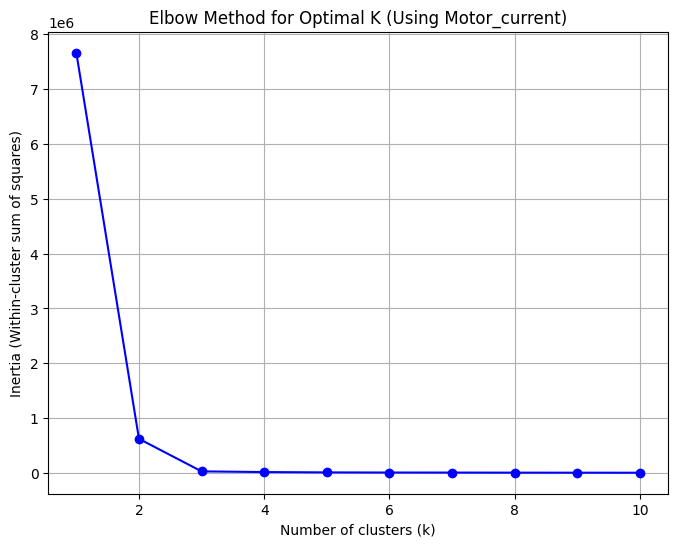

         min  median  max
Cluster                  
0       0.02    0.04 2.22
1       2.24    3.82 9.29
95th Percentile: 6.1175
99th Percentile: 6.237500000000001


In [ ]:
filtered_data_copy = pre_failure_data.copy()

metric_column = 'Motor_current'

get_k(filtered_data_copy, metric_column)
fit_cluster(filtered_data_copy, metric_column, 2)


Motor_current = filtered_data_copy[filtered_data_copy['Cluster'] == 1]['Motor_current']


percentile_95 = np.percentile(Motor_current, 95)
percentile_99 = np.percentile(Motor_current, 99)

print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")

In [ ]:
filtered_data_copy = pre_failure_data.copy()

metric_column = 'Motor_current'

get_k(filtered_data_copy, metric_column)
fit_cluster(filtered_data_copy, metric_column, 2)


Motor_current = data[filtered_data_copy['Cluster'] == 1]['LPS']


percentile_95 = np.percentile(Motor_current, 95)
percentile_99 = np.percentile(Motor_current, 99)

print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")

In [ ]:
import pandas as pd

pre_failure_data['DV_pressure_Is_Anomaly'] = pre_failure_data['DV_pressure'].apply(lambda x: 1 if x >= 5.423500000000001 else 0).astype(int)
pre_failure_data['Motor_current_Is_Anomaly'] = pre_failure_data['Motor_current'].apply(lambda x: 1 if x >= 6.237500000000001 else 0).astype(int)

<ipython-input-13-858dce40f08d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_failure_data['DV_pressure_Is_Anomaly'] = pre_failure_data['DV_pressure'].apply(lambda x: 1 if x >= 5.423500000000001 else 0).astype(int)
<ipython-input-13-858dce40f08d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_failure_data['Motor_current_Is_Anomaly'] = pre_failure_data['Motor_current'].apply(lambda x: 1 if x >= 6.237500000000001 else 0).astype(int)


In [ ]:
pre_failure_data[pre_failure_data['DV_pressure_Is_Anomaly'] == 1]['timestamp'].dt.date.unique()

array([datetime.date(2020, 2, 5), datetime.date(2020, 2, 13),
       datetime.date(2020, 2, 15), datetime.date(2020, 2, 16),
       datetime.date(2020, 2, 17), datetime.date(2020, 2, 18),
       datetime.date(2020, 2, 19), datetime.date(2020, 2, 21),
       datetime.date(2020, 2, 23), datetime.date(2020, 2, 27),
       datetime.date(2020, 2, 28), datetime.date(2020, 4, 6),
       datetime.date(2020, 4, 7), datetime.date(2020, 4, 8),
       datetime.date(2020, 4, 9), datetime.date(2020, 4, 10),
       datetime.date(2020, 4, 11), datetime.date(2020, 4, 12),
       datetime.date(2020, 4, 13), datetime.date(2020, 4, 15),
       datetime.date(2020, 4, 17), datetime.date(2020, 4, 19),
       datetime.date(2020, 4, 23), datetime.date(2020, 4, 27),
       datetime.date(2020, 4, 28), datetime.date(2020, 4, 29),
       datetime.date(2020, 5, 3), datetime.date(2020, 5, 4),
       datetime.date(2020, 5, 6), datetime.date(2020, 5, 7),
       datetime.date(2020, 5, 8), datetime.date(2020, 5, 9),
   

In [ ]:
pre_failure_data[pre_failure_data['Motor_current_Is_Anomaly'] == 1]['timestamp'].dt.date.unique()

array([datetime.date(2020, 2, 1), datetime.date(2020, 2, 2),
       datetime.date(2020, 2, 3), datetime.date(2020, 2, 4),
       datetime.date(2020, 2, 5), datetime.date(2020, 2, 6),
       datetime.date(2020, 2, 7), datetime.date(2020, 2, 8),
       datetime.date(2020, 2, 9), datetime.date(2020, 2, 10),
       datetime.date(2020, 2, 11), datetime.date(2020, 2, 12),
       datetime.date(2020, 2, 13), datetime.date(2020, 2, 14),
       datetime.date(2020, 2, 15), datetime.date(2020, 2, 16),
       datetime.date(2020, 2, 17), datetime.date(2020, 2, 18),
       datetime.date(2020, 2, 19), datetime.date(2020, 2, 20),
       datetime.date(2020, 2, 21), datetime.date(2020, 2, 22),
       datetime.date(2020, 2, 23), datetime.date(2020, 2, 24),
       datetime.date(2020, 2, 25), datetime.date(2020, 2, 26),
       datetime.date(2020, 2, 27), datetime.date(2020, 2, 28),
       datetime.date(2020, 3, 1), datetime.date(2020, 3, 2),
       datetime.date(2020, 3, 3), datetime.date(2020, 3, 4),
     

In [ ]:
failure_data = pd.DataFrame({
    'Start Time': ['4/18/2020 0:00', '5/29/2020 23:30', '6/5/2020 10:00', '7/15/2020 14:30'],
    'End Time': ['4/18/2020 23:59', '5/30/2020 6:00', '6/7/2020 14:30', '7/15/2020 19:00']
})


In [ ]:
conditions = [
    (pre_failure_data['timestamp'].dt.date >= failure_data.iloc[0]['Window Start']) & (pre_failure_data['timestamp'].dt.date <= failure_data.iloc[0]['Window End']),
    (pre_failure_data['timestamp'].dt.date >= failure_data.iloc[1]['Window Start']) & (pre_failure_data['timestamp'].dt.date <= failure_data.iloc[1]['Window End']),
    (pre_failure_data['timestamp'].dt.date >= failure_data.iloc[2]['Window Start']) & (pre_failure_data['timestamp'].dt.date <= failure_data.iloc[2]['Window End']),
    (pre_failure_data['timestamp'].dt.date >= failure_data.iloc[3]['Window Start']) & (pre_failure_data['timestamp'].dt.date <= failure_data.iloc[3]['Window End']),
]

choices = [1, 1, 1, 1]

# Assign labels
pre_failure_data['label'] = np.select(conditions, choices, default=0)

<ipython-input-31-b122623bdf97>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_failure_data['label'] = np.select(conditions, choices, default=0)


In [ ]:
pre_failure_data[pre_failure_data['label'] == 1]['timestamp'].dt.date.unique()

array([datetime.date(2020, 4, 11), datetime.date(2020, 4, 12),
       datetime.date(2020, 4, 13), datetime.date(2020, 4, 14),
       datetime.date(2020, 4, 15), datetime.date(2020, 4, 16),
       datetime.date(2020, 4, 17), datetime.date(2020, 5, 22),
       datetime.date(2020, 5, 23), datetime.date(2020, 5, 24),
       datetime.date(2020, 5, 25), datetime.date(2020, 5, 26),
       datetime.date(2020, 5, 27), datetime.date(2020, 5, 28),
       datetime.date(2020, 5, 29), datetime.date(2020, 5, 30),
       datetime.date(2020, 5, 31), datetime.date(2020, 6, 1),
       datetime.date(2020, 6, 2), datetime.date(2020, 6, 3),
       datetime.date(2020, 6, 4), datetime.date(2020, 7, 8),
       datetime.date(2020, 7, 9), datetime.date(2020, 7, 10),
       datetime.date(2020, 7, 11), datetime.date(2020, 7, 12),
       datetime.date(2020, 7, 13), datetime.date(2020, 7, 14)],
      dtype=object)

In [ ]:
print(failure_data)

           Start Time            End Time Previous Start Time  \
0 2020-04-18 00:00:00 2020-04-18 23:59:00                 NaT   
1 2020-05-29 23:30:00 2020-05-30 06:00:00 2020-04-18 00:00:00   
2 2020-06-05 10:00:00 2020-06-07 14:30:00 2020-05-29 23:30:00   
3 2020-07-15 14:30:00 2020-07-15 19:00:00 2020-06-05 10:00:00   

    Previous End Time Window Start  Window End  
0                 NaT   2020-04-11  2020-04-17  
1 2020-04-18 23:59:00   2020-05-22  2020-05-28  
2 2020-05-30 06:00:00   2020-05-29  2020-06-04  
3 2020-06-07 14:30:00   2020-07-08  2020-07-14  


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Assuming pre_failure_data is already your dataframe with features and label
X = data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
y = data['label']

# Separate continuous and binary features
continuous_features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']
binary_features = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Apply Random Undersampling to balance the training dataset
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Scale only continuous features
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train_resampled[continuous_features])
X_test_continuous = scaler.transform(X_test[continuous_features])

# Combine scaled continuous features with binary features
X_train_scaled = pd.DataFrame(X_train_continuous, columns=continuous_features)
X_test_scaled = pd.DataFrame(X_test_continuous, columns=continuous_features)

# Add binary features back into the scaled data
X_train_scaled[binary_features] = X_train_resampled[binary_features].reset_index(drop=True)
X_test_scaled[binary_features] = X_test[binary_features].reset_index(drop=True)

# Initialize Lasso model
lasso = Lasso(alpha=0.1)  # You can start with alpha=0.1 or tune it

# Fit the model
lasso.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred = (lasso.predict(X_test_scaled) > 0.6).astype(int)  # Convert probabilities to 0 or 1 using threshold 0.5

# Evaluate the model
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.9848406141805783
Confusion Matrix:
[[732997  10437]
 [  1061  13979]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    743434
           1       0.57      0.93      0.71     15040

    accuracy                           0.98    758474
   macro avg       0.79      0.96      0.85    758474
weighted avg       0.99      0.98      0.99    758474



In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lasso.coef_
})

# Sort by absolute coefficient values to identify the most important features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the most important features
print("\nImportant Features based on Lasso Coefficients:")
print(feature_importance)


Important Features based on Lasso Coefficients:
            Feature  Coefficient  Absolute Coefficient
3       DV_pressure         0.27                  0.27
5   Oil_temperature         0.04                  0.04
2                H1        -0.04                  0.04
1               TP3        -0.00                  0.00
0               TP2         0.00                  0.00
4        Reservoirs        -0.00                  0.00
6     Motor_current         0.00                  0.00
7              COMP        -0.00                  0.00
8        DV_eletric         0.00                  0.00
9            Towers        -0.00                  0.00
10              MPG        -0.00                  0.00
11              LPS         0.00                  0.00
12  Pressure_switch         0.00                  0.00
13        Oil_level         0.00                  0.00
14  Caudal_impulses         0.00                  0.00
